Starting from the T = infinite configuration, first the system is equilibrated then it is performed the averages of the quantities that one wants to know. This first measurment its done at T = 2. In performing the other measurments at lower temperatures one starts from the last configuration at the previous temperature, thus one has no need to equilibrate evrey time at different temperatures. 

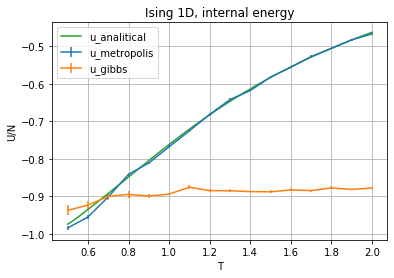

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

x, f, error = np.loadtxt("eneVStemp_metro.out", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error, label = 'u_metropolis')
y, g, errorg = np.loadtxt("eneVStemp_gibbs.out", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(y,g,yerr=errorg, label = 'u_gibbs')
plt.title('Ising 1D, internal energy')
plt.plot(T, e, label = 'u_analitical')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid('true')
plt.legend()

plt.show()

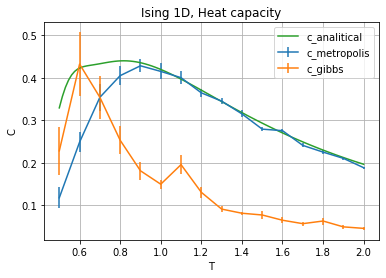

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

x, f, error = np.loadtxt("heatVStemp_metro.out", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error, label = 'c_metropolis')
y, g, errorg = np.loadtxt("heatVStemp_gibbs.out", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(y,g,yerr=errorg, label = 'c_gibbs')
plt.plot(T, heat, label = 'c_analitical')
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.grid('true')
plt.legend()

plt.show()

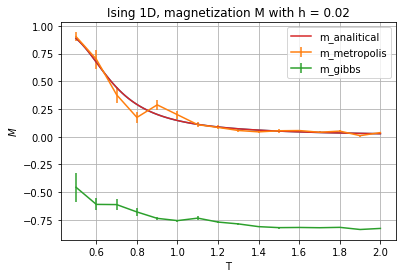

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')

x, f, error = np.loadtxt("magVStemp_metro.out", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error, label = 'm_metropolis')
y, g, errorg = np.loadtxt("magVStemp_gibbs.out", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(y,g,yerr=errorg, label = 'm_gibbs')
plt.plot(T, M, label = 'm_analitical')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.grid('true')
plt.legend()

plt.show()

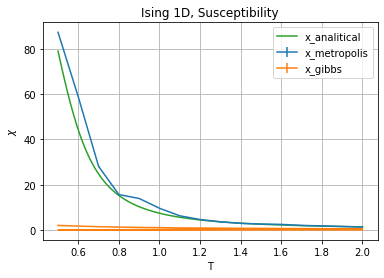

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


x, f, error = np.loadtxt("chiVStemp_metro.out", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f,yerr=error, label = 'x_metropolis')
y, g, errorg = np.loadtxt("chiVStemp_gibbs.out", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(y,g,yerr=errorg, label = 'x_gibbs')
plt.plot(T, X, label = 'x_analitical')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.grid('true')
plt.legend()

plt.show()